In [1]:
import numpy as np
import glob
import xarray as xr
import pandas as pd
# rad_path = '/g/data/oe9/project/team-drip/AWAP/AWAP_month_radiation.nc'
# radnc = xr.open_dataset(rad_path)
# # radnc = radnc.rename({'e0_avg':'pet'})
# radnc = radnc.where(radnc>=0, np.nan)
# radnc = radnc.squeeze()
# radnc
# spi = xr.open_dataset('/g/data/oe9/project/team-drip/Rainfall/SPI_awap/SPI_12M_masked.nc')
# spi

# rainfall = xr.open_dataarray('/g/data/oe9/project/team-drip/AWAP/AWAP_month_rain.nc')
EVI_5km  = xr.open_dataset('/g/data/oe9/project/team-drip/resampled_NDVI/coarse_EVI.nc')
# EVI_5km
NDVI_5km = xr.open_dataset('/g/data/oe9/project/team-drip/resampled_NDVI/coarse_NDVI.nc')
NDVI_5km
AET_5km  = xr.open_dataset('/g/data/oe9/project/team-drip/ENV_5km_month/AET_5km_month.nc')
AET_5km
SPI_5km_12M = xr.open_dataset('/g/data/oe9/project/team-drip/Rainfall/SPI_awap/SPI_12M_masked.nc')
SPI_5km_12M = SPI_5km_12M.isel(time=range(1,204))
mask = ~np.isinf(SPI_5km_12M.SPI_12M)
SPI_5km_12M = SPI_5km_12M.where(mask, drop=True)
SPI_5km_12M

<xarray.Dataset>
Dimensions:    (latitude: 263, longitude: 280, time: 203)
Coordinates:
  * latitude   (latitude) float64 -24.55 -24.6 -24.65 -24.7 -24.75 -24.8 ...
  * longitude  (longitude) float64 138.5 138.6 138.6 138.7 138.7 138.8 138.8 ...
  * time       (time) datetime64[ns] 2000-02-01 2000-03-01 2000-04-01 ...
Data variables:
    SPI_12M    (latitude, longitude, time) float64 nan nan nan nan nan nan ...

In [2]:
# average monthly to annual
EVI_5km_yearly  = EVI_5km.evi.resample(time="1A").mean(dim='time')
# EVI_5km_yearly
NDVI_5km_yearly = NDVI_5km.ndvi.resample(time="1A").mean(dim='time')
# NDVI_5km_yearly
AET_5km_yearly  = AET_5km.aet.resample(time="1A").mean(dim='time')
AET_5km_yearly
SPI_5km_12M_yearly  = SPI_5km_12M.SPI_12M.resample(time="1A").mean(dim='time')
SPI_5km_12M_yearly

/g/data/v10/public/modules/agdc-py3-env/20171214/envs/agdc/lib/python3.6/site-packages/xarray/core/common.py:594: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  label=label, base=base)


<xarray.DataArray 'SPI_12M' (latitude: 263, longitude: 280, time: 17)>
array([[[ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan],
        ..., 
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]],

       [[ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan],
        ..., 
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]],

       ..., 
       [[ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan],
        ..., 
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]],

       [[ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan],
        ..., 
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]]])
Coordinates:
  * time       (time) datetime64[ns] 2000-12-31 2001-12-31 2002-12-31 ...
  * latitude   (latitude) float64 -24.55 -24.6 -24.65 -24.7 -24.75 -24.8 ...
  * longitude  (longitude) float64 138.5 138.6 138.6 138.7 138.7

/g/data/v10/public/modules/agdc-py3-env/20171214/envs/agdc/lib/python3.6/site-packages/xarray/plot/utils.py:51: FutureWarning: 'pandas.tseries.converter.register' has been moved and renamed to 'pandas.plotting.register_matplotlib_converters'. 
  converter.register()


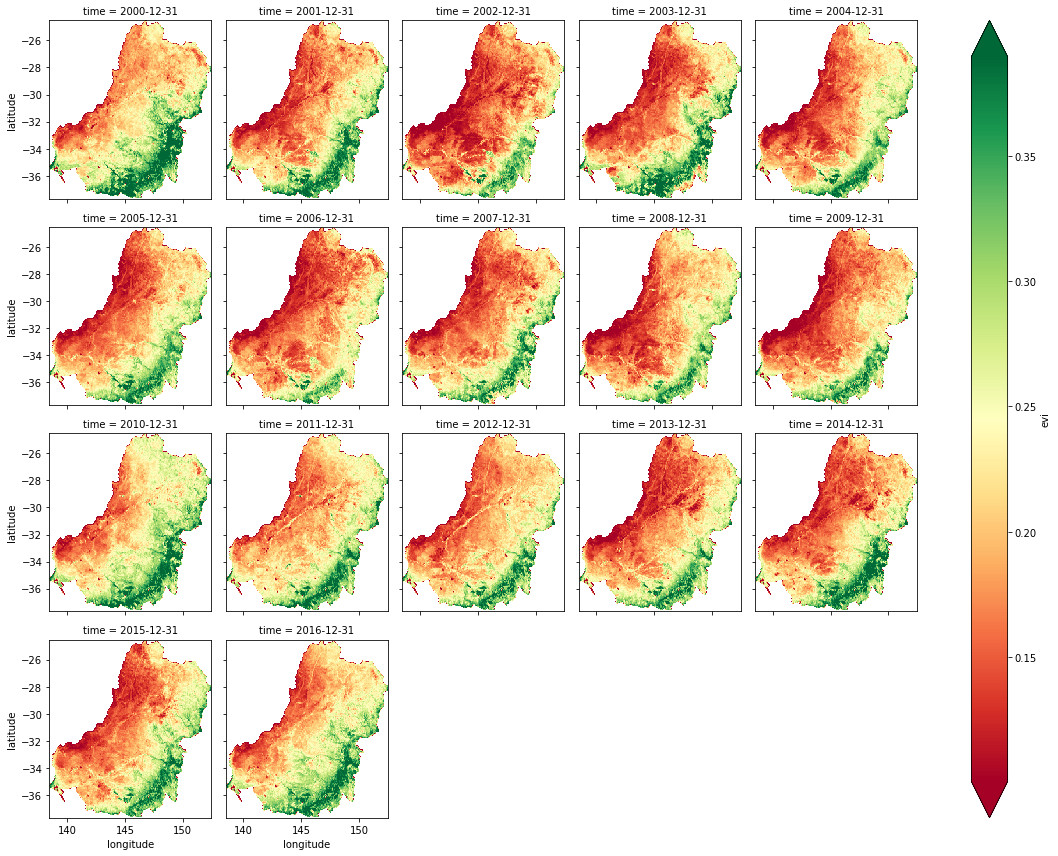

In [3]:
# EVI
%matplotlib inline
EVI_5km_yearly.isel(time = range(0,17)).plot.imshow(col='time', robust = True, col_wrap=5, cmap = 'RdYlGn')

In [4]:
# %matplotlib inline
# EVI_5km_yearly.isel(time = range(0,17)).plot()
# fname = '/home/599/rg6346/EVI_test.png'
# plt.savefig(fname, dpi=300, facecolor='w', edgecolor='w',
#         orientation='portrait', papertype=None, format=None,
#         transparent=False, bbox_inches=None, pad_inches=0.1,
#         frameon=None)

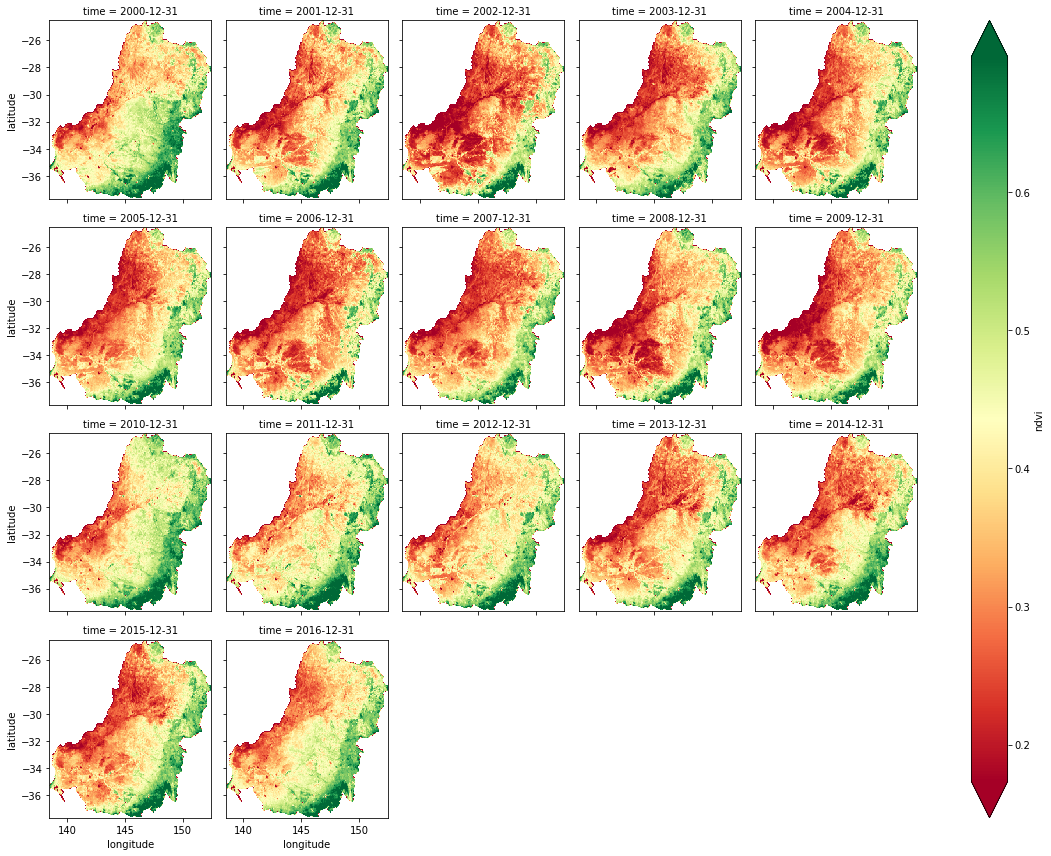

In [5]:
# NDVI
%matplotlib inline
NDVI_5km_yearly.isel(time = range(0,17)).plot.imshow(col='time', robust = True, col_wrap=5, cmap = 'RdYlGn')

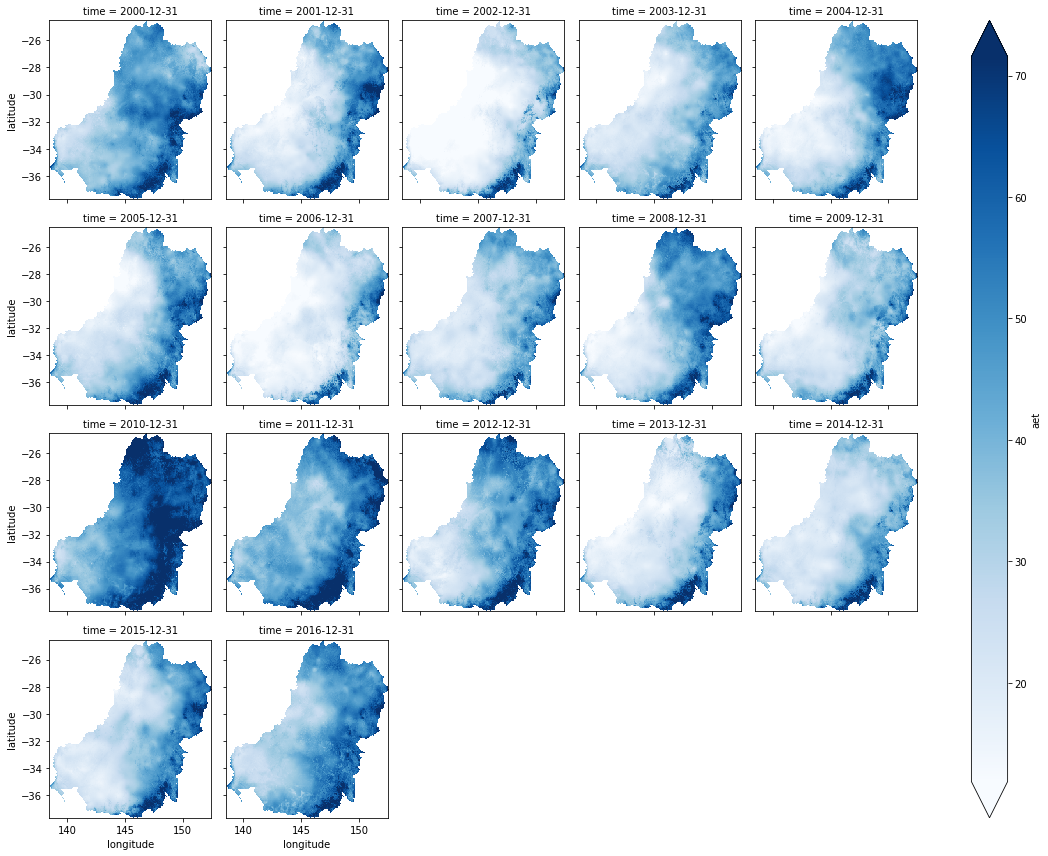

In [6]:
# AET
%matplotlib inline
AET_5km_yearly.isel(time = range(0,17)).plot.imshow(col='time', robust = True, col_wrap=5, cmap = 'Blues')

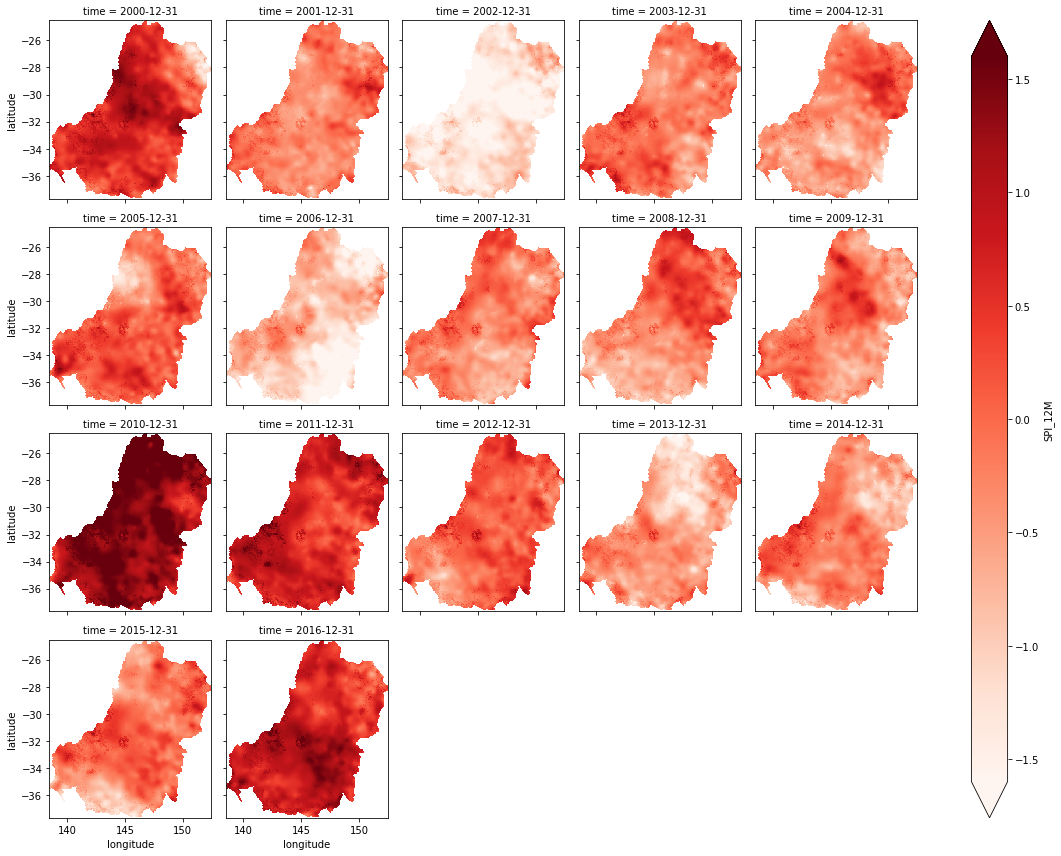

In [7]:
# SPI_12M
%matplotlib inline
SPI_5km_12M_yearly.isel(time = range(0,17)).plot.imshow(col='time', robust = True, col_wrap=5, cmap = 'Reds')

In [8]:
evi_ts  = EVI_5km_yearly.mean(dim={'latitude', 'longitude'}, skipna=True, keep_attrs=False)
ndvi_ts = NDVI_5km_yearly.mean(dim={'latitude', 'longitude'}, skipna=True, keep_attrs=False)
aet_ts = AET_5km_yearly.mean(dim={'latitude', 'longitude'}, skipna=True, keep_attrs=False)
spi_ts = SPI_5km_12M_yearly.mean(dim={'latitude', 'longitude'}, skipna=True, keep_attrs=False)

spi_ts

<xarray.DataArray 'SPI_12M' (time: 17)>
array([ 0.551099, -0.204127, -1.326163, -0.126644, -0.290077,  0.060598,
       -0.96792 , -0.245032, -0.166558, -0.219171,  1.380888,  0.687054,
        0.073117, -0.574694, -0.297128, -0.127877,  0.778997])
Coordinates:
  * time     (time) datetime64[ns] 2000-12-31 2001-12-31 2002-12-31 ...

In [ ]:
# climatology_dt = coarse_EVI.groupby('time.month').mean('time')
# anomalies_EVI = coarse_EVI.groupby('time.month') - climatology_dt

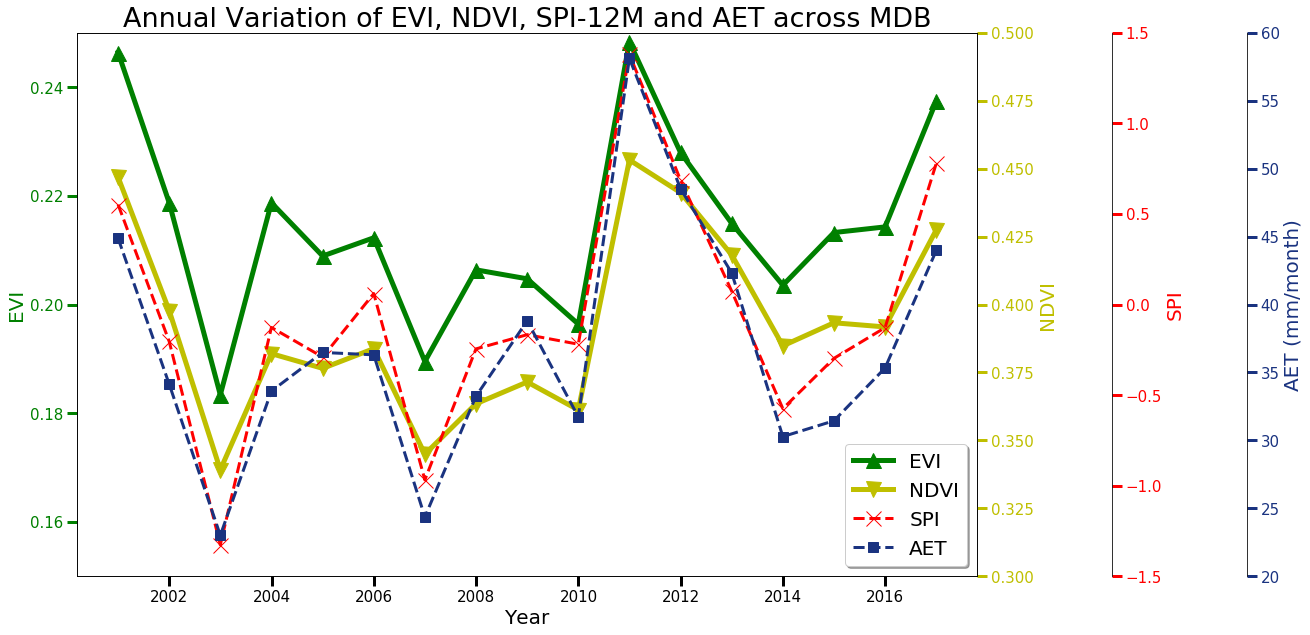

In [87]:


import matplotlib.pyplot as plt


def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots(figsize=(20,10))
fig.subplots_adjust(right=0.75)
# fig.figure
# plt.figure(figsize=(1,4)

par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()

# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.15))
par3.spines["right"].set_position(("axes", 1.3))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
make_patch_spines_invisible(par3)
# Second, show the right spine.
par2.spines["right"].set_visible(True)
par3.spines["right"].set_visible(True)
p1, = host.plot(evi_ts.time,evi_ts,'g^-', label="EVI",linewidth=5,markersize=15)
p2, = par1.plot(ndvi_ts.time,ndvi_ts,'yv-', label="NDVI",linewidth=5,markersize=15)
p3, = par2.plot(spi_ts.time,spi_ts,'rx--', label="SPI",linewidth=3,markersize=15)
p4, = par3.plot(aet_ts.time,aet_ts,'s--',color=(0.1, 0.2, 0.5), label="AET",linewidth=3,markersize=10)


host.set_xlabel("Year")
host.set_ylabel("EVI")
par1.set_ylabel("NDVI")
par2.set_ylabel("SPI")
par3.set_ylabel("AET (mm/month)")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
par3.yaxis.label.set_color(p4.get_color())

host.xaxis.label.set_fontsize(20)
host.yaxis.label.set_fontsize(20)
par1.yaxis.label.set_fontsize(20)
par2.yaxis.label.set_fontsize(20)
par3.yaxis.label.set_fontsize(20)

host.set_ylim(bottom=0.15, top = 0.25)
par1.set_ylim(bottom=0.3, top = 0.5)
par2.set_ylim(bottom=-1.5, top = 1.5)
par3.set_ylim(bottom=20, top = 60)


tkw = dict(size=10, width=3)
host.tick_params(axis='y', labelsize=15, colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', labelsize=15, colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', labelsize=15, colors=p3.get_color(), **tkw)
par3.tick_params(axis='y', labelsize=15,colors=p4.get_color(), **tkw)
host.tick_params(axis='x', labelsize=15, **tkw)

host.set_title("Annual Variation of EVI, NDVI, SPI-12M and AET across MDB",fontsize=27)

lines = [p1, p2, p3, p4]

host.legend(lines, [l.get_label() for l in lines],loc=4, shadow=True, fontsize=20)

fname = '/g/data/oe9/project/team-drip/results/timeseries_all_MDB.png'
fig.savefig(fname, dpi=600)

In [88]:
# fname = '/g/data/oe9/project/team-drip/results/timeseries_all_MDB.png'
# fig.savefig(fname, dpi=600)

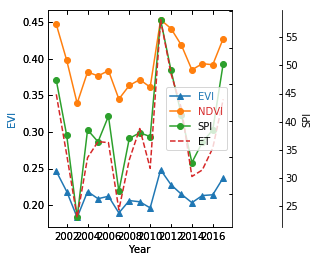

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_toolkits.axes_grid1 import host_subplot

def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.55)

fig, host = plt.subplots()
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

# host = host_subplot(111)
par1 = host.twinx()
par2 = host.twinx()


offset = 50
par2.axis["right"] = new_fixed_axis(loc="right", axes=par2,
                                        offset=(offset, 0))
par2.axis["right"].toggle(all=True)


# host.set_xlabel("Time")
# host.set_ylabel("VI")
# par1.set_ylabel("ET")
p1, = host.plot(evi_ts.time,evi_ts,'^-', label="EVI")
p2, = host.plot(ndvi_ts.time,ndvi_ts,'o-', label="NDVI")
p2, = par1.plot(spi_ts.time,spi_ts,'o-', label="SPI")
p2, = par2.plot(aet_ts.time,aet_ts,'--', label="ET")
# plt.plot(evi_ts.time,evi_ts,'g^-')
# plt.plot(ndvi_ts.time,ndvi_ts,'yo-')
# plt.plot(aet_ts.time,aet_ts,'b--')
# plt.show()
# plt.xlabel('Time')
# plt.ylabel('VI')
# plt.title("VI across MDB")

host.set_xlabel("Year")
host.set_ylabel("EVI")
par2.set_ylabel("NDVI")
par2.set_ylabel("ET")
par2.set_ylabel("SPI")

# p1, = host.plot([0, 1, 2], [0, 1, 2], label="NDVI")
# p2, = par1.plot([0, 1, 2], [0, 3, 2], label="EVI")
# p3, = par2.plot([0, 1, 2], [50, 30, 15], label="ET")

leg = plt.legend()

host.yaxis.get_label().set_color(p1.get_color())
leg.texts[0].set_color(p1.get_color())

par.yaxis.get_label().set_color(p2.get_color())
leg.texts[1].set_color(p2.get_color())

plt.show()


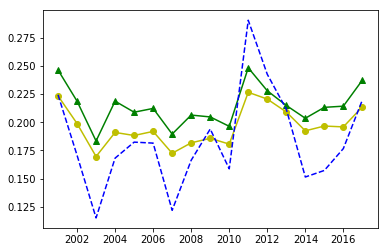

In [11]:
import matplotlib.pyplot as plt
fname = '/home/599/rg6346/EVI_test.png'
fig = plt.figure()
plt.plot(evi_ts.time,evi_ts,'g^-',ndvi_ts.time,ndvi_ts/2,'yo-',aet_ts.time,aet_ts/200,'b--')
fig.savefig(fname, dpi=300)

